# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dede Husen
- Email:adehusen@gmail.com
- Id Dicoding: dhe_zhen

## Persiapan

### Menyiapkan library yang dibutuhkan

In [72]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sql
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

### Menyiapkan data yang akan diguankan

In [73]:
data_url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/f4a7541bc3dfca0012e20778e135c03b3e76dc67/employee/employee_data.csv"
data_df = pd.read_csv(
    data_url,
    encoding='windows-1252',
)

## Data Understanding

Melihat Gambaran Dataset

Melihat 10 baris pertama isi dari dataset

In [74]:
data_df.head(10)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
8,9,36,0.0,Travel_Frequently,635,Research & Development,18,1,Medical,1,...,1,80,0,8,2,3,8,1,1,7
9,10,32,0.0,Travel_Rarely,1018,Research & Development,3,2,Life Sciences,1,...,4,80,0,10,6,3,7,7,7,7


Melihat deskripsi data

In [75]:
data_df.describe(include='all')


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


melithat informasi dataset

In [76]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Melihat jumlah missing values

In [77]:
data_df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


cek duplikasi dataset

In [78]:
duplkasi_data = data_df.duplicated().sum()
print(f"Jumlah duplikasi data: {duplkasi_data}")

Jumlah duplikasi data: 0


Hasil ringkasan dataset:

1. Total Dataset: 1470
2. Jumlah Fitur/kolom : 35 kolom
3. jumlah mising value : 412 missing value pada fitur atrrition
4. jumlah duplikat data
5. Tipe data :  Numerik:float64(1) int64(26), Categorical =  object(8)



## Data Preparation / Preprocessing

handling missing value

In [79]:
# handling missing value
data_df ['Attrition'] = data_df ['Attrition'].fillna(data_df ['Attrition'].mode()[0])

#cek nilai null
print(data_df.isnull().sum())


EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [80]:
#sebaran distribusi fitur target (Attrition)
attrition_counts = data_df['Attrition'].value_counts()
attrition_counts

,count
Attrition,
0.0,1291
1.0,179


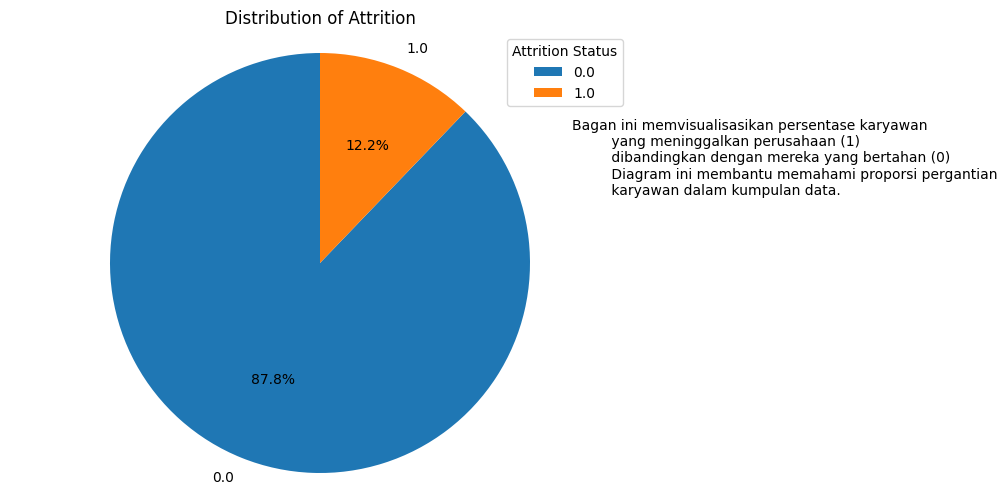

In [81]:
#Visualisasi Persentase atrribution
attrition_counts = data_df['Attrition'].value_counts()

# membuat grafik PIE
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attrition')
plt.axis('equal')

# Add a legend (optional, but recommended for clarity)
plt.legend(title="Attrition Status" )

# Add explanation (optional, but recommended)
plt.text(1.2, 0.5,
         """Bagan ini memvisualisasikan persentase karyawan
         yang meninggalkan perusahaan (1)
         dibandingkan dengan mereka yang bertahan (0)
         Diagram ini membantu memahami proporsi pergantian
         karyawan dalam kumpulan data. """, fontsize=10, verticalalignment='center')

plt.show()


Distribusi fitur numerik

In [82]:
# Distribusi Variabel Numerik
numerical_columns = data_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns


['EmployeeId',
 'Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [83]:
numerical_description = data_df[numerical_columns].describe()
numerical_description

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.121769,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.327130,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [84]:
# Calculate the average of 'MonthlyIncome'
average_monthly_income = data_df['MonthlyIncome'].mean()

# Print the result
print(f"Rata-rata pendapatan bulanan: {average_monthly_income}")


Rata-rata pendapatan bulanan: 6502.931292517007


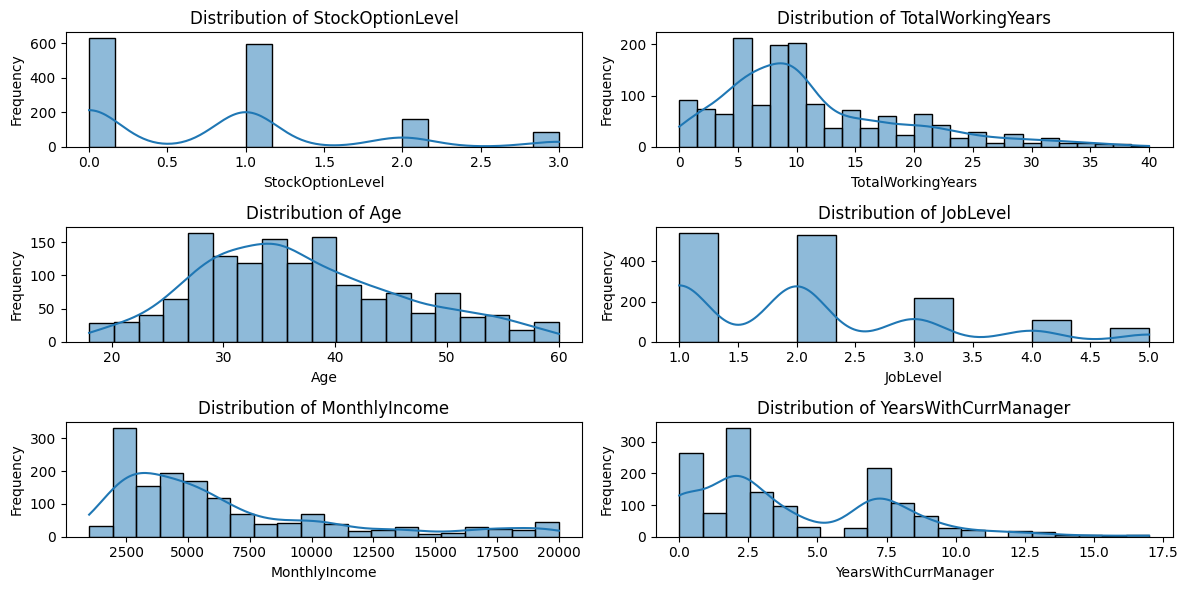

In [85]:
# Select only numerical features for correlation calculation
numerical_data = data_df.select_dtypes(include=[np.number])

# Calculate correlations with Attrition using only numerical features
correlations = numerical_data.corr()['Attrition'].drop('Attrition').sort_values(ascending=False)

# Select top 6 numerical features with highest absolute correlation
top_6_features = correlations.abs().nlargest(6).index.tolist()

# Create subplots for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(top_6_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data_df[feature], kde=True)  # Use histplot for better visualization
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Analisis Distribui fitur numerik terhadapat jumlah karyawan

1. Plot 1:  Distribusi frekuensi dari saham yang mereka miliki
- Plot ini menunjukkan frekuensi karyawan berdasarkan level opsi saham yang mereka miliki (0 sampai 3).

- Mayoritas karyawan berada di level 0 dan 1, dengan jumlah yang cukup banyak. Level 2 dan 3 memiliki frekuensi jauh lebih sedikit.

2. Plot 2 : Distribusi Total lama kerja
- Sebagian besar karyawan memiliki pengalaman kerja antara 0 sampai 15 tahun.
- Ada sedikit karyawan dengan pengalaman sangat tinggi (hingga sekitar 40 tahun).
- rata-rata usia bekeja secara umum adalah 36,9 tahun

3. Plot 3 : Usia Karyawan
- Puncak distribusi ada di rentang usia 30 sampai 40 tahun, dengan sedikit karyawan yang lebih muda atau lebih tua.

4. Plot 4: Disktribusi Level Pekerjaan
- Distribusi ini menunjukkan sebaran level pekerjaan karyawan dari level 1 sampai 5.
- Mayoritas karyawan berada di level 1 dan 2, dengan jumlah menurun di level yang lebih tinggi.

5. Plot 5: Distribusi Pendapatan Bulanan

- Plot ini menggambarkan distribusi pendapatan bulanan karyawan.
- Sebagian besar pendapatan berada di kisaran rendah sampai menengah, dengan hanya sedikit karyawan memiliki pendapatan sangat tinggi (hingga USD 20.000).
- Pendapatan Rata rata bulanan USD 6502.9


6. Plot 6: Distribusi dari Lama bekerja dengan manajer yang sama
- Plot ini menunjukkan distribusi lama waktu karyawan bekerja dengan manajer mereka saat ini.
- Sebagian besar karyawan bekerja dengan manajer saat ini selama 0 sampai 5 tahun, dengan penurunan frekuensi setelah itu, namun beberapa sampai sekitar 17 tahun.

Analsis hubungan fitur numerik dengan targer Attrition

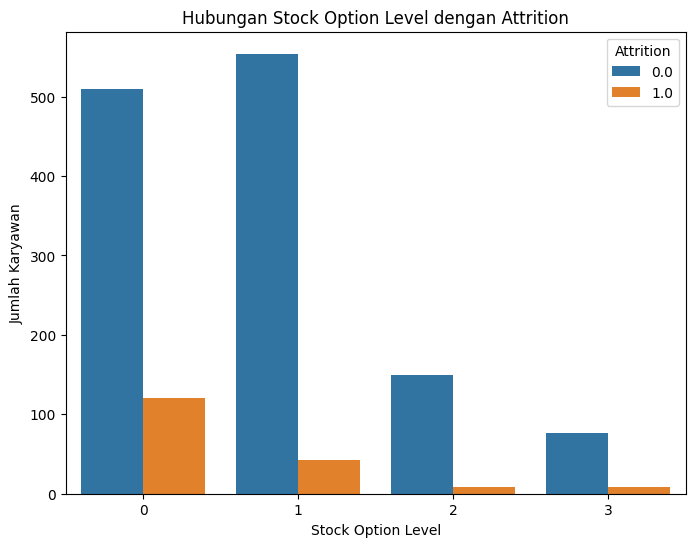

In [86]:

# Visualisasi hubungan StockOptionLevel dengan Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=data_df)
plt.title('Hubungan Stock Option Level dengan Attrition')
plt.xlabel('Stock Option Level')
plt.ylabel('Jumlah Karyawan')
plt.show()


Dari diagram diatas kita dapat melihat bahwa jumlah saham yang sedikit lebih banyak yang meninggalkan perusahaan

<ipython-input-87-94834ce70ef5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='TotalWorkingYears', data=data_df, palette='pastel')  #


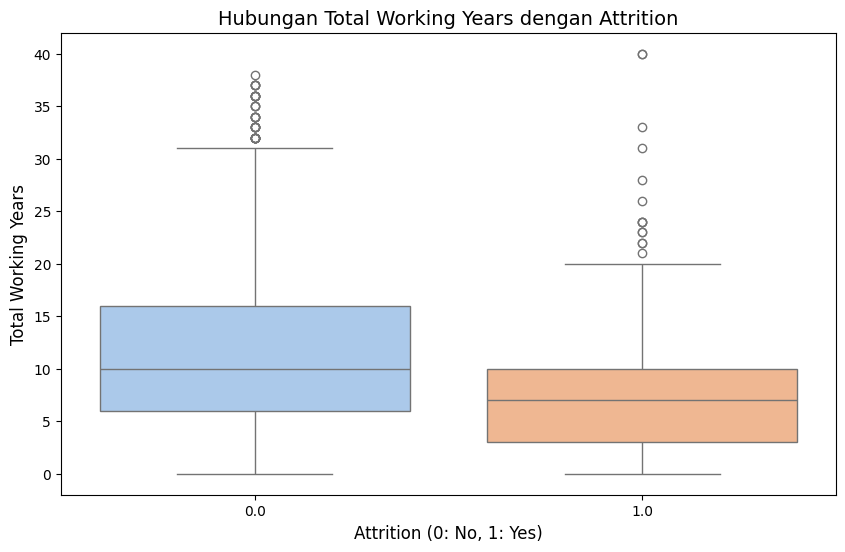

In [87]:
# Visualisasi hubungan Total Working Years dengan Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=data_df, palette='pastel')  #
plt.title('Hubungan Total Working Years dengan Attrition', fontsize=14)
plt.xlabel('Attrition (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Total Working Years', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


<ipython-input-88-8cfd4d5474fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=data_df, palette='pastel')


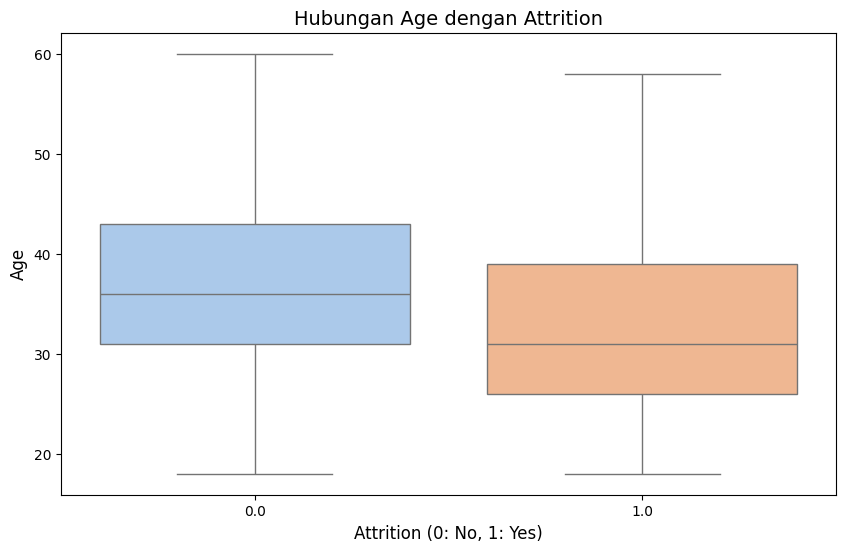

In [88]:
# Visualisasi hubungan Age dengan Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=data_df, palette='pastel')
plt.title('Hubungan Age dengan Attrition', fontsize=14)
plt.xlabel('Attrition (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


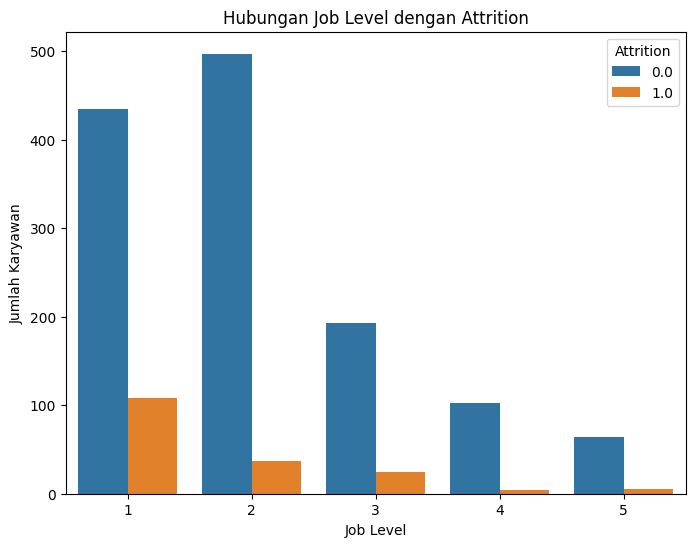

In [89]:
# Visualisasi hubungan JobLevel dengan Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=data_df)
plt.title('Hubungan Job Level dengan Attrition')
plt.xlabel('Job Level')
plt.ylabel('Jumlah Karyawan')
plt.show()


<ipython-input-90-c04e7151ea67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=data_df, palette='pastel')


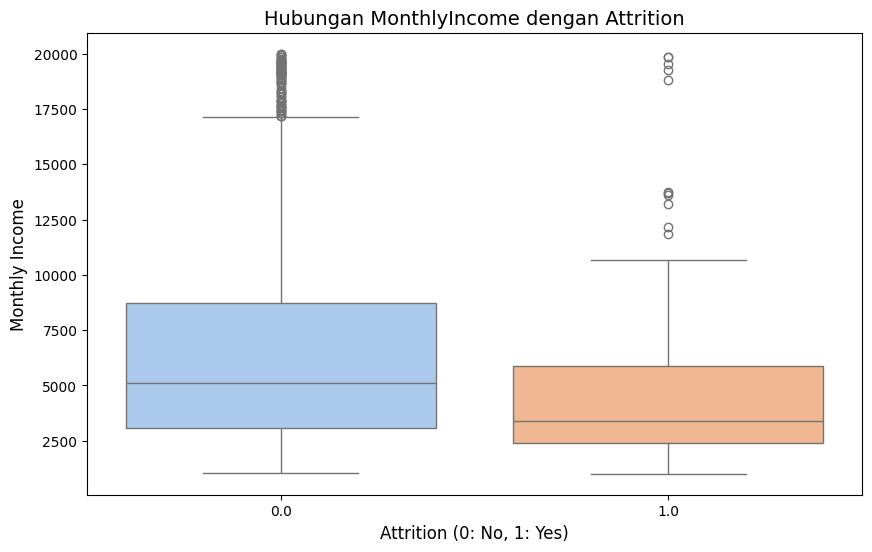

In [90]:

# Visualisasi hubungan MonthlyIncome dengan Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data_df, palette='pastel')
plt.title('Hubungan MonthlyIncome dengan Attrition', fontsize=14)
plt.xlabel('Attrition (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


<ipython-input-91-ae387a281e33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=data_df, palette='pastel')


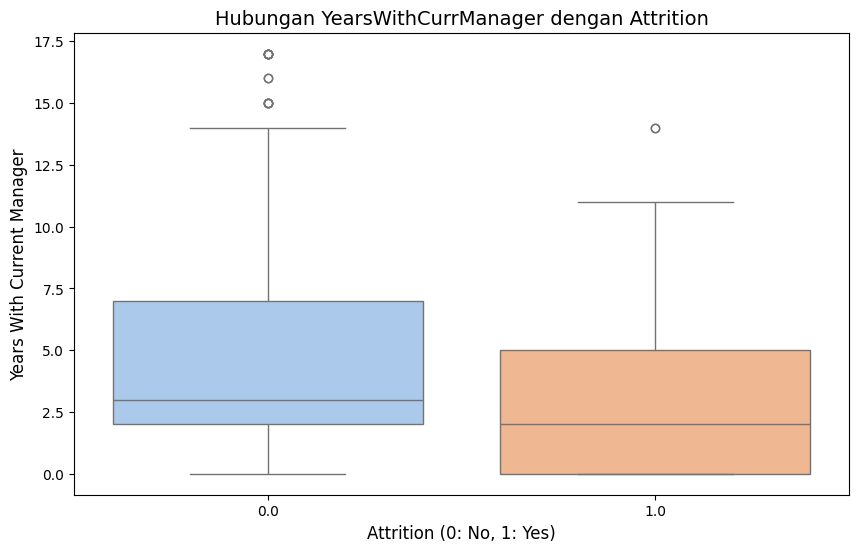

In [91]:
# Visualisasi hubungan YearsWithCurrManager dengan Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=data_df, palette='pastel')
plt.title('Hubungan YearsWithCurrManager dengan Attrition', fontsize=14)
plt.xlabel('Attrition (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Years With Current Manager', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Analisis Fitur Numerik:

1. StockOptionLevel
- Dari diagram jumlah saham diatas kita dapat melihat bahwa jumlah saham yang sedikit lebih banyak yang meninggalkan perusahaan

2. Total working Year
- Karyawan dengan pengalaman kerja yang lebih panjang cenderung bertahan lebih banyak, sedangkan yang memiliki pengalaman kerja lebih pendek cenderung lebih banyak resign.
- Hal ini bisa diartikan bahwa semakin berpengalaman seorang karyawan, kemungkinan besar ia akan tetap bertahan di perusahaan. Karyawan dengan pengalaman yang lebih muda/pendek cenderung lebih rentan untuk meninggalkan pekerjaan.

3. Age
- Karyawan yang lebih muda lebih cenderung untuk resign dibandingkan
karyawan yang lebih tua.
- Usia yang lebih tua mungkin berkorelasi dengan tingkat stabilitas atau keputusan untuk bertahan di perusahaan.

4. JobLevel dengan Attrition
- Di Job Level 1, proporsi karyawan yang resign terlihat cukup tinggi dibandingkan job level lainnya (jumlah resign sekitar 100, yang bertahan sekitar 430).
- Job Level 2, meski jumlah karyawan yang bertahan sangat banyak (sekitar 500), jumlah yang resign jauh lebih kecil (sekitar 35-40).
- Job Level 3 ke atas jumlah yang resign semakin kecil, menandakan semakin tinggi level pekerjaan, semakin kecil kemungkinan resign.

5. Monthly Income
- Karyawan dengan pendapatan bulanan lebih tinggi cenderung lebih sering bertahan.
- Pendapatan yang lebih rendah tampaknya berkorelasi dengan tingkat resign yang lebih tinggi.

6. years With Current Manager
- Karyawan yang memiliki hubungan lebih lama dengan manajer saat ini lebih cenderung bertahan.
- Durasi yang lebih pendek dengan manajer tampaknya berkaitan dengan kemungkinan resign yang lebih tinggi, mungkin karena kurangnya ikatan atau kepuasan terhadap manajemen langsung.

---



Analsis Fitur Kategorikal terhadap target

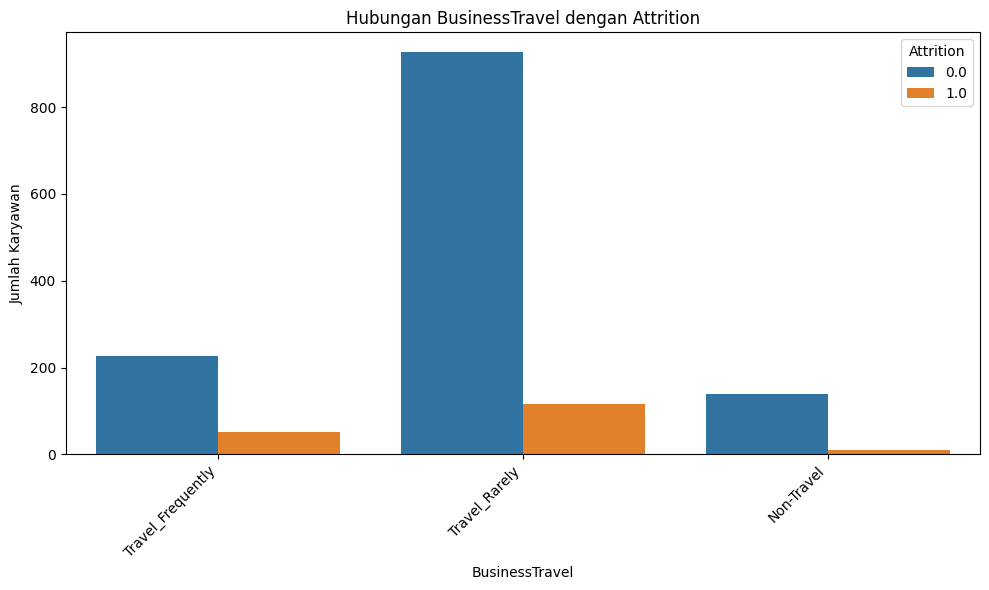

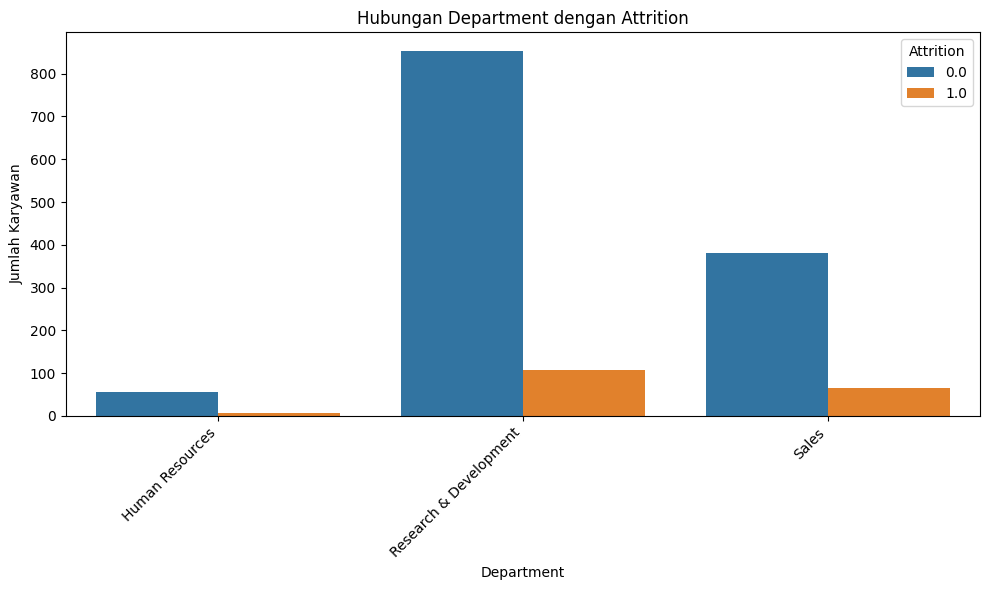

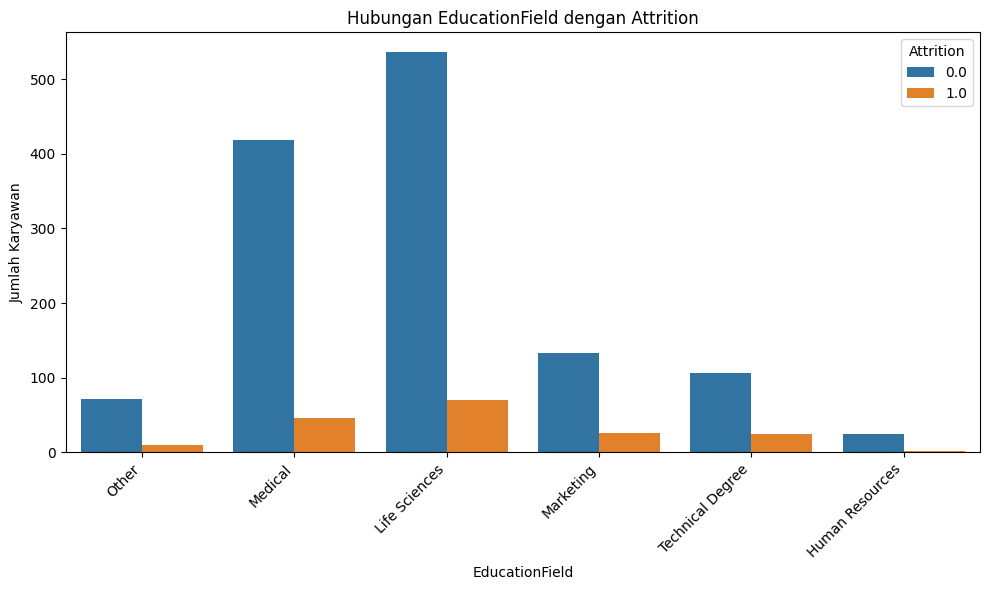

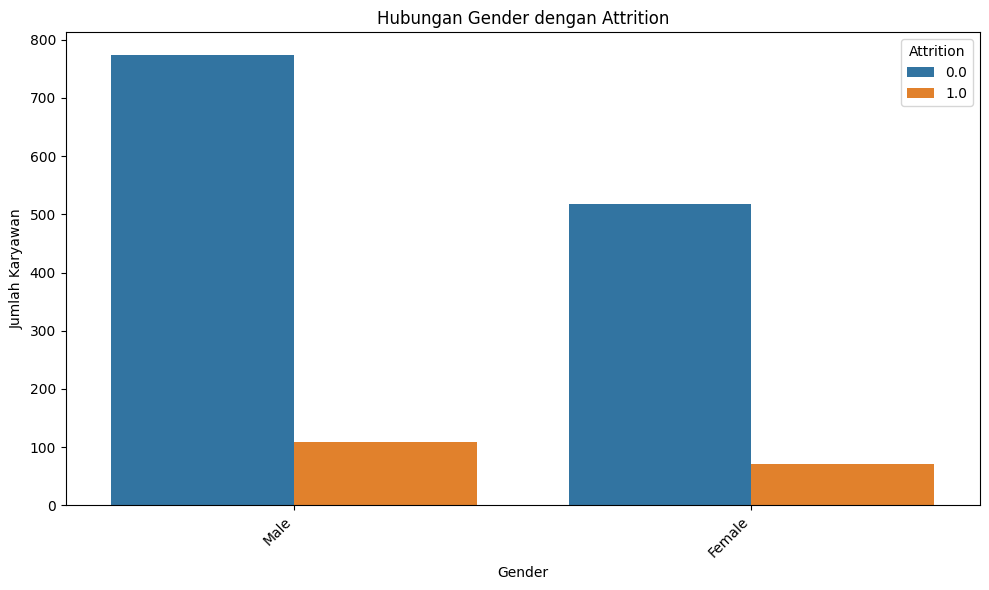

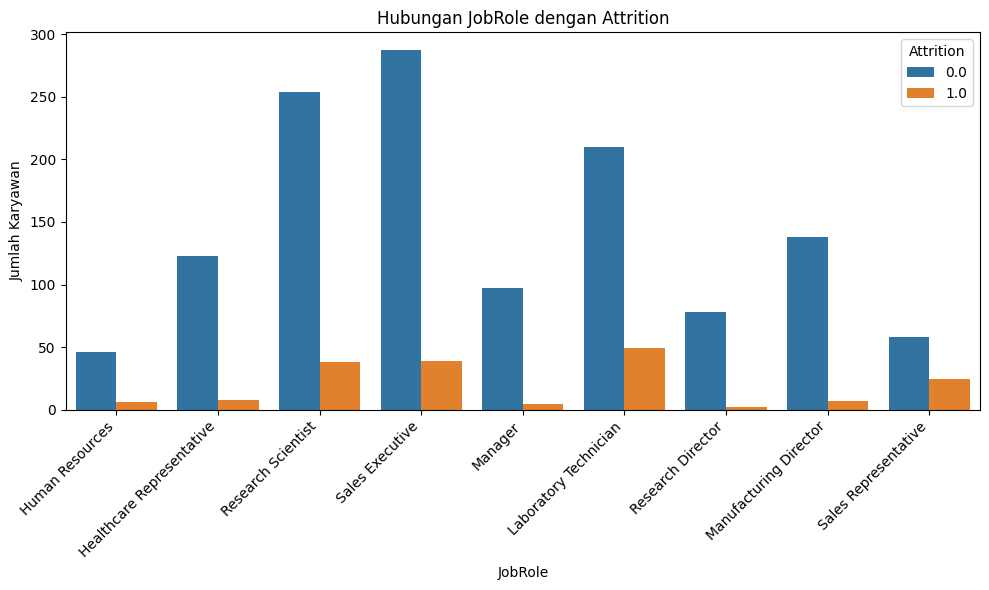

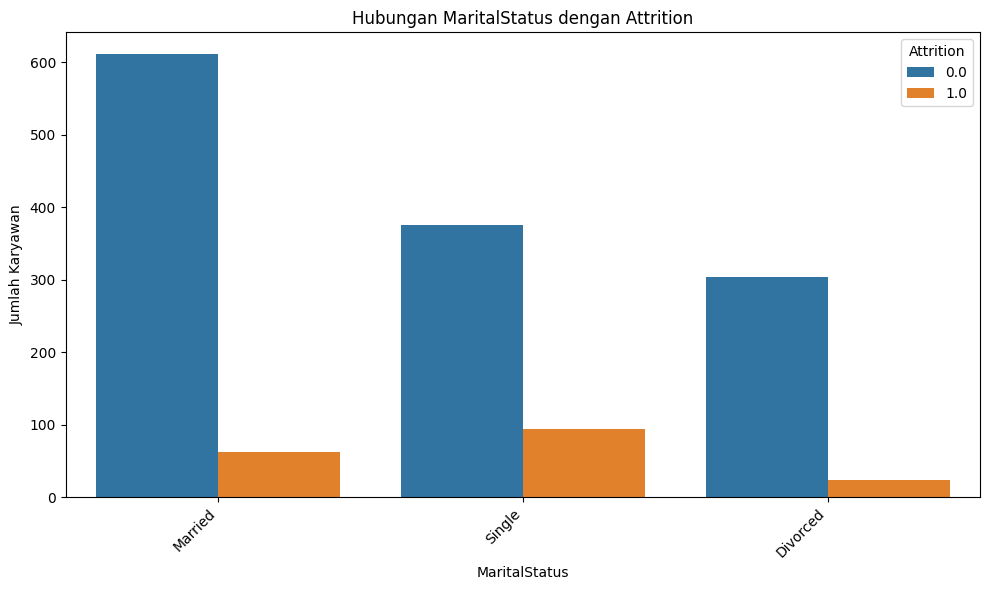

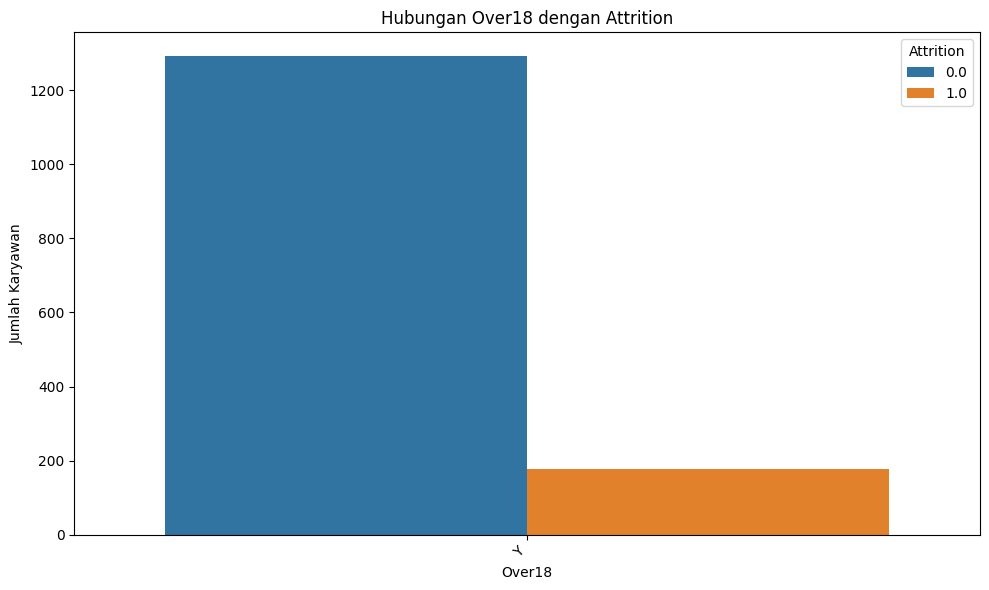

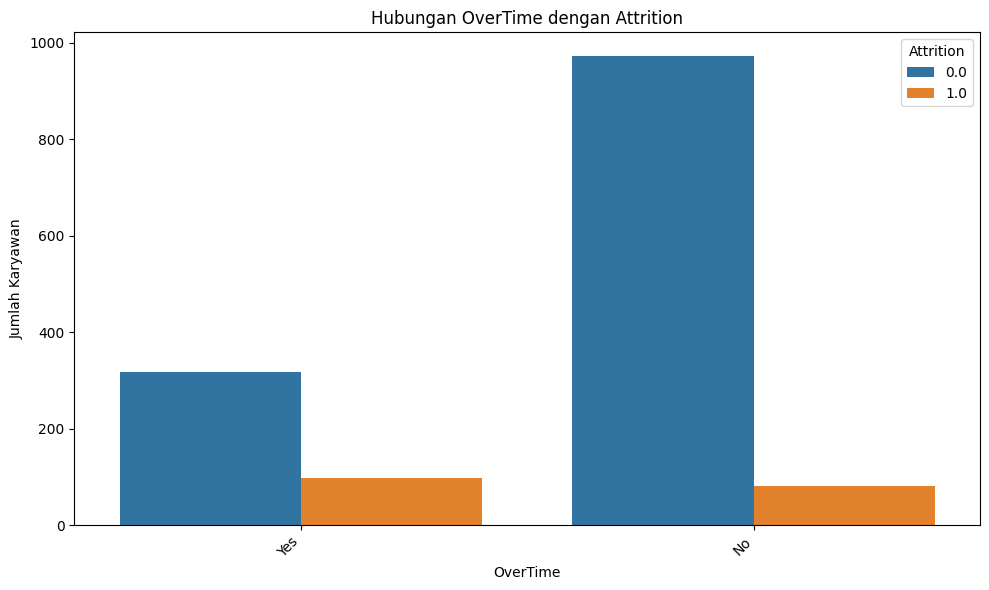

In [92]:
# Analisis Fitur Kategorikal terhadap target

categorical_columns = data_df.select_dtypes(include=['object']).columns.tolist()

# Loop through each categorical feature
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Attrition', data=data_df)
    plt.title(f'Hubungan {column} dengan Attrition')
    plt.xlabel(column)
    plt.ylabel('Jumlah Karyawan')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


Anslisis Fitur Kategorikal:
1. Bussines Travel
- Karyawan yang jarang bepergian cenderung resign lebih banyak, sementara yang sering bepergian atau tidak bepergian sama sekali cenderung lebih stabil di perusahaan.
- Frekuensi perjalanan bisnis berkorelasi negatif dengan tingkat atrisi; perjalanan yang jarang bisa meningkatkan ketidakpuasan atau stres.


2. Educational Field
- Bidang Pendidikan Berpengaruh pada Attrition: Karyawan di bidang Life Sciences memiliki kecenderungan lebih tinggi untuk resign.
- Potensi ketidakpuasan di berbagai bidang pendidikan mungkin disebabkan oleh faktor pekerjaan, imbalan, atau keterkaitan dengan kepuasan kerja.
Jika ada aspek lain ya

3. Gender
- Preferensi Gender dalam Attrition: Karyawan laki-laki lebih cenderung bertahan di perusahaan dibandingkan perempuan, yang memiliki tingkat resign lebih tinggi.
- Kesesuaian faktor seperti kepuasan kerja, lingkungan kerja, dan keseimbangan antara kehidupan pribadi dan pekerjaan mungkin berkontribusi pada perbedaan tersebut.

4. Job Role
- Pengaruh Job Role pada Attrition: Beberapa peran, terutama Sales Executive, memiliki tantangan lebih besar dalam mempertahankan karyawan, sedangkan peran lain seperti Research Scientist menunjukkan stabilitas tinggi.
- Strategi retensi harus disesuaikan berdasarkan peran pekerjaan untuk mengurangi tingkat resign.

5. Marital Status
- status Pernikahan dan Attrition: Karyawan yang lajang memiliki kecenderungan lebih besar untuk bertahan, sementara karyawan lajang dan bercerai menunjukkan tingkat resign yang lebih tinggi.
- Perusahaan mungkin dapat mempertimbangkan program dukungan atau kesejahteraan yang lebih menargetkan karyawan lajang dan menikah untuk meningkatkan retensi.

6  Overtime
- Hubungan Negatif antara Overtime dan Attrition: Karyawan yang tidak lembur (OverTime = No) menunjukkan tingkat bertahan yang lebih baik, sementara karyawan yang lembur lebih berisiko untuk resign meskipun jumlahnya lebih kecil.
- Perusahaan sebaiknya mengevaluasi beban kerja dan pengaturan lembur untuk meningkatkan retensi karyawan.

7. over 18
- Usia dan Attrition: Dengan tidak adanya karyawan di bawah 18 tahun dan mayoritas karyawan di atas 18 tahun bertahan, ini menunjukkan bahwa karyawan dewasa cenderung memiliki stabilitas dan tingkat resign yang rendah.
- Keberadaan karyawan dewasa dapat berkontribusi pada lingkungan kerja yang lebih stabil.
Jika ada analisis lain yang ingin Anda lakukan atau pertanyaan tambahan, silakan beri tahu!

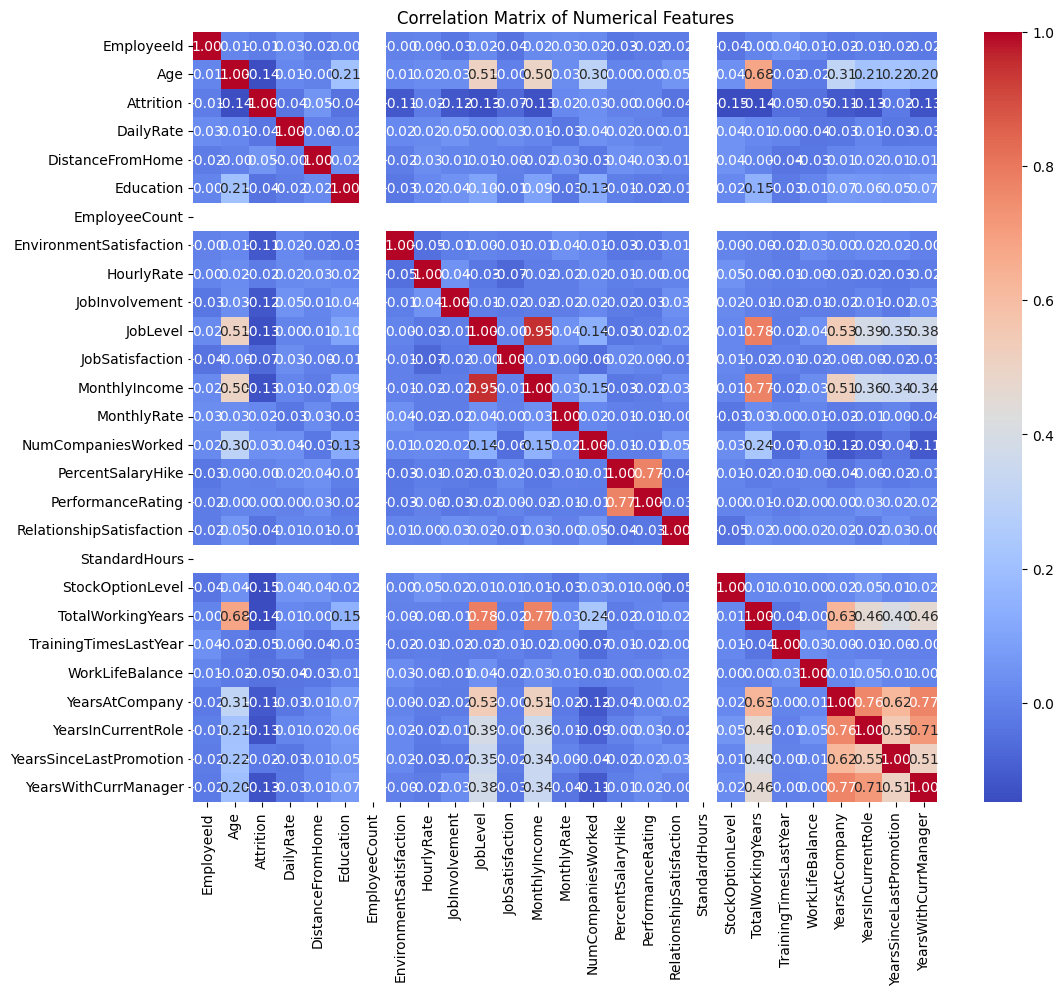

In [93]:
# Calculate the correlation matrix for numerical features
numerical_corr = numerical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


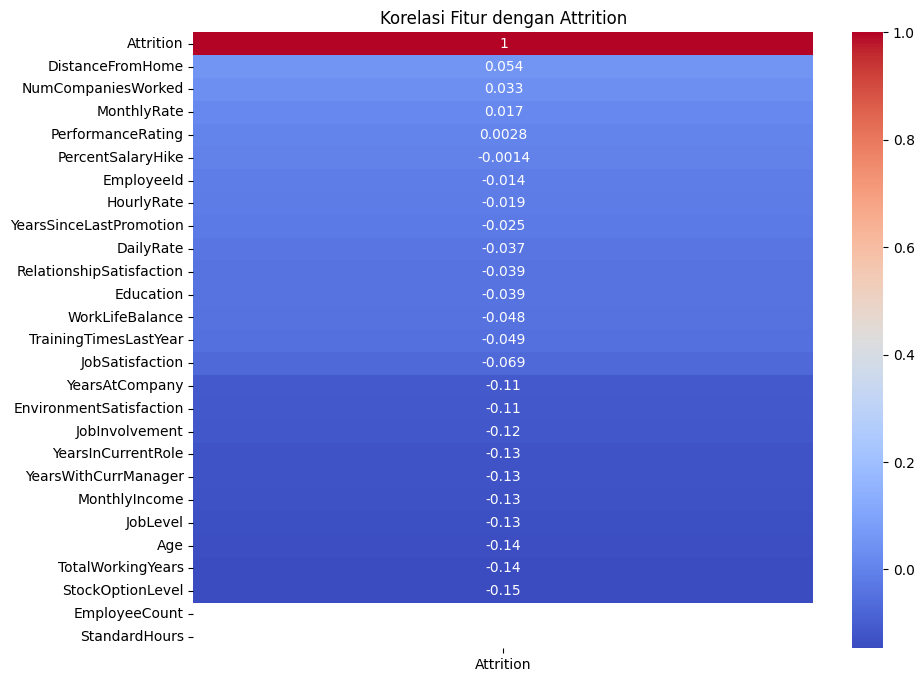

In [94]:

# Korelasi Fitur Numerik dengan Attrition
corr_matrix = data_df.corr(numeric_only=True)

# Visualisasi Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur dengan Attrition")
plt.show()

In [95]:

data_df.to_csv('data_cleaned.csv', index=False)

In [96]:
# Cramér's V for Categorical-Categorical Correlation
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

cramers_v_results = []
for i, feature1 in enumerate(categorical_columns):
    for feature2 in categorical_columns[i+1:]:
        # Changed 'df' to 'data_df'
        confusion_matrix = pd.crosstab(data_df[feature1], data_df[feature2])
        cramers_v_score = cramers_v(confusion_matrix)
        cramers_v_results.append({
            "Feature 1": feature1,
            "Feature 2": feature2,
            "Cramér's V": cramers_v_score
        })


cramers_v_df = pd.DataFrame(cramers_v_results)
cramers_v_df

,Feature 1,Feature 2,Cramér's V
0,BusinessTravel,Department,Department Human Resources 0.040028 ...
1,BusinessTravel,EducationField,EducationField Human Resources 0.309372 Li...
2,BusinessTravel,Gender,Gender Female 0.082801 Male 0.067607 d...
3,BusinessTravel,JobRole,JobRole Healthcare Representative 0.213903 ...
4,BusinessTravel,MaritalStatus,MaritalStatus Divorced 0.107103 Married ...
5,BusinessTravel,Over18,Over18 Y NaN dtype: float64
6,BusinessTravel,OverTime,OverTime No 0.052034 Yes 0.082826 dtype...
7,Department,EducationField,EducationField Human Resources 4.356730 Li...
8,Department,Gender,Gender Female 0.071005 Male 0.057975 d...
9,Department,JobRole,JobRole Healthcare Representative 3.146808 ...


Hasil analisis Cramer's v Tentang Hubungan antar variabel kategorikal:  

1.  Hubungan Moderat-Kuat Terlihat Antara  lain:

- BusinessTravel dan EducationField (V ~ 0.31)
- BusinessTravel dan JobRole (V ~ 0.21)
- Gender dan JobRole (V ~ 0.35)
- JobRole dan MaritalStatus (V ~ 0.20)
-  Jika nilai untuk Department vs EducationField, Department vs JobRole, dan EducationField vs JobRole sebenarnya tinggi (mendekati 1), itu akan menunjukkan hubungan yang sangat kuat, yang masuk akal mengingat bagaimana fitur-fitur ini saling terkait dalam struktur organisasi perusahaan. Namun, nilai yang >1 secara teknis salah untuk Cramér's V.
2.  Hubungan Lemah atau Sangat Lemah Terlihat Antara:

- Sebagian besar pasangan lainnya, termasuk hubungan antara fitur-fitur seperti Gender, MaritalStatus, OverTime, dan sebagian besar fitur lainnya.

In [97]:
#scaling fikktur  numerik
# Assign data_df to processed_df to continue with preprocessing
processed_df = data_df.copy()

numerical_columns_to_scale = processed_df.select_dtypes(include=[np.number]).columns.tolist()
if 'Attrition' in numerical_columns_to_scale:
    numerical_columns_to_scale.remove('Attrition')

scaler = MinMaxScaler()

processed_df_scaled = processed_df.copy()

processed_df_scaled[numerical_columns_to_scale] = scaler.fit_transform(processed_df_scaled[numerical_columns_to_scale])

print("\nProcessed and Scaled DataFrame Head:")
print(processed_df_scaled.head())


Processed and Scaled DataFrame Head:
   EmployeeId       Age  Attrition     BusinessTravel  DailyRate  \
0    0.000000  0.476190        0.0  Travel_Frequently   0.960630   
1    0.000681  0.452381        1.0      Travel_Rarely   0.743737   
2    0.001361  0.785714        1.0      Travel_Rarely   0.874016   
3    0.002042  0.571429        0.0  Travel_Frequently   0.324266   
4    0.002723  0.523810        0.0      Travel_Rarely   0.781675   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources          0.000000       0.75          Other   
1  Research & Development          0.357143       0.25        Medical   
2  Research & Development          0.107143       0.75  Life Sciences   
3                   Sales          0.892857       0.50      Marketing   
4  Research & Development          0.035714       0.75        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0            0.0  ...                  0.333333  

In [98]:
print("\nVerification after Data Preparation:")

print("\nMissing values in processed data:")
print(processed_df_scaled.isnull().sum().sum()) # Check total missing values

# Check data types in the processed dataframe
print("\nData types in processed data:")
print(processed_df_scaled.dtypes.value_counts())

# Check the first few rows of the processed and scaled data
print("\nHead of processed and scaled data:")
print(processed_df_scaled.head())

# Check the distribution of the target variable in the processed data
print("\nDistribution of Attrition in processed data:")
print(processed_df_scaled['Attrition'].value_counts())

# Optional: Verify the range of scaled numerical features (should be between 0 and 1)
print("\nRange of scaled numerical features:")
for col in numerical_columns_to_scale:
    print(f"{col}: Min={processed_df_scaled[col].min():.4f}, Max={processed_df_scaled[col].max():.4f}")



Verification after Data Preparation:

Missing values in processed data:
0

Data types in processed data:
float64    27
object      8
Name: count, dtype: int64

Head of processed and scaled data:
   EmployeeId       Age  Attrition     BusinessTravel  DailyRate  \
0    0.000000  0.476190        0.0  Travel_Frequently   0.960630   
1    0.000681  0.452381        1.0      Travel_Rarely   0.743737   
2    0.001361  0.785714        1.0      Travel_Rarely   0.874016   
3    0.002042  0.571429        0.0  Travel_Frequently   0.324266   
4    0.002723  0.523810        0.0      Travel_Rarely   0.781675   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources          0.000000       0.75          Other   
1  Research & Development          0.357143       0.25        Medical   
2  Research & Development          0.107143       0.75  Life Sciences   
3                   Sales          0.892857       0.50      Marketing   
4  Research & Development     

In [99]:
processed_df_scaled.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.000000,0.476190,0.0,Travel_Frequently,0.960630,Human Resources,0.000000,0.75,Other,0.0,...,0.333333,0.0,0.333333,0.175,0.333333,0.666667,0.150,0.111111,0.066667,0.117647
1,0.000681,0.452381,1.0,Travel_Rarely,0.743737,Research & Development,0.357143,0.25,Medical,0.0,...,0.000000,0.0,0.000000,0.375,0.333333,0.000000,0.025,0.000000,0.000000,0.000000
2,0.001361,0.785714,1.0,Travel_Rarely,0.874016,Research & Development,0.107143,0.75,Life Sciences,0.0,...,0.666667,0.0,1.000000,0.450,0.333333,1.000000,0.250,0.000000,0.133333,0.411765
3,0.002042,0.571429,0.0,Travel_Frequently,0.324266,Sales,0.892857,0.50,Marketing,0.0,...,1.000000,0.0,0.333333,0.575,0.333333,1.000000,0.500,0.222222,0.266667,0.470588
4,0.002723,0.523810,0.0,Travel_Rarely,0.781675,Research & Development,0.035714,0.75,Medical,0.0,...,0.333333,0.0,1.000000,0.500,0.333333,0.666667,0.125,0.166667,0.000000,0.117647


In [100]:
processed_df_scaled.to_csv('processed_employee_data.csv', index=False)

## Modeling

In [101]:
#menerapkan teknik smote untuk menyeiikmbangkan data
# Separate features (X) and target (y)
X = processed_df_scaled.drop('Attrition', axis=1)
y = processed_df_scaled['Attrition']

# Before applying SMOTE, encode categorical features
# Identify categorical columns (object type)
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # Use drop_first=True to avoid multicollinearity

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (now with encoded categorical features)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the shape of the original and resampled data
print("Shape of original features:", X.shape)
print("Shape of resampled features:", X_resampled.shape)
print("Shape of original target:", y.shape)
print("Shape of resampled target:", y_resampled.shape)

# Check the new distribution of the target variable
print("\nDistribution of Attrition after SMOTE:")
print(y_resampled.value_counts())

Shape of original features: (1470, 47)
Shape of resampled features: (2582, 47)
Shape of original target: (1470,)
Shape of resampled target: (2582,)

Distribution of Attrition after SMOTE:
Attrition
0.0    1291
1.0    1291
Name: count, dtype: int64


In [102]:
X = processed_df_scaled.drop(columns='Attrition')
y = processed_df_scaled['Attrition']

In [103]:
# Split the selected data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2065, 47)
Shape of X_test: (517, 47)
Shape of y_train: (2065,)
Shape of y_test: (517,)


In [104]:

rf_model = RandomForestClassifier(n_estimators=100, # Number of trees in the forest
                                  random_state=42,
                                  n_jobs=-1) # Use all available cores

# Train the model using the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [105]:

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Melatih model menggunakan data pelatihan
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [106]:
# 2. SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [107]:
# 3. Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [108]:
# 4. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluation

In [109]:
def model_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    return accuracy  # Return accuracy for comparison

# Evaluate models and store accuracy scores
model_accuracies = {}

# 1. Random Forest
# Change rf_model to model_rf to use the correctly trained model
model_accuracies['Random Forest'] = model_evaluation(model_rf, X_test, y_test)

# 2. SVM
model_accuracies['SVM'] = model_evaluation(svm_model, X_test, y_test)

# 3. Logistic Regression
model_accuracies['Logistic Regression'] = model_evaluation(lr_model, X_test, y_test)

# 4. Decision Tree
model_accuracies['Decision Tree'] = model_evaluation(dt_model, X_test, y_test)

# Compare model performance based on accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest performing model based on accuracy: {best_model} with accuracy {model_accuracies[best_model]}")

Accuracy: 0.9555125725338491
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       259
         1.0       0.98      0.93      0.95       258

    accuracy                           0.96       517
   macro avg       0.96      0.96      0.96       517
weighted avg       0.96      0.96      0.96       517

Accuracy: 0.9264990328820116
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       259
         1.0       0.93      0.93      0.93       258

    accuracy                           0.93       517
   macro avg       0.93      0.93      0.93       517
weighted avg       0.93      0.93      0.93       517

Accuracy: 0.8549323017408124
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       259
         1.0       0.88      0.83      0.85       258

    accuracy                           0.85       517
   macro avg       0.86      0.85      0.

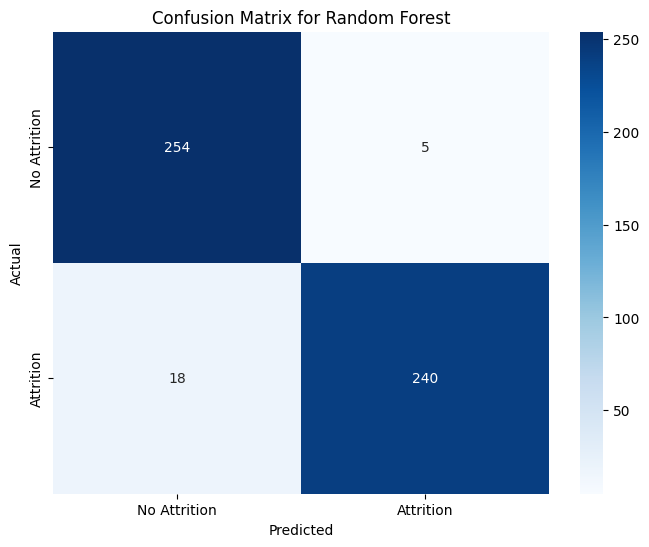

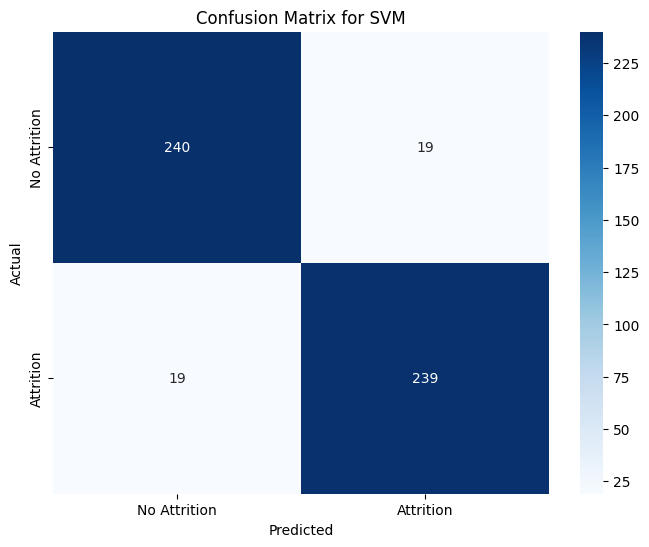

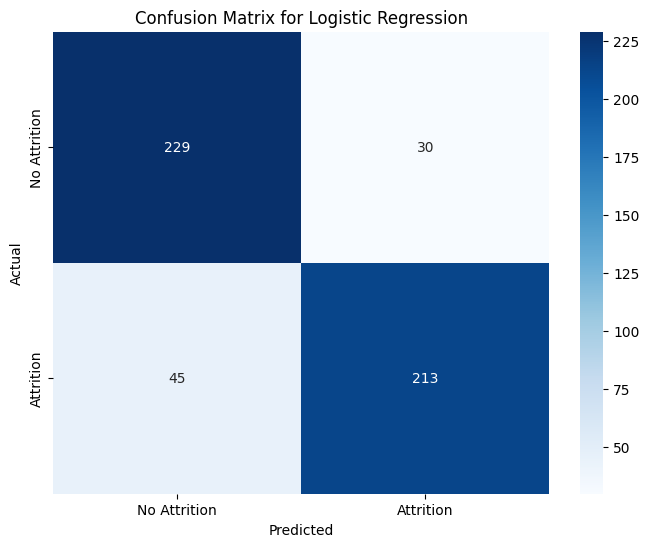

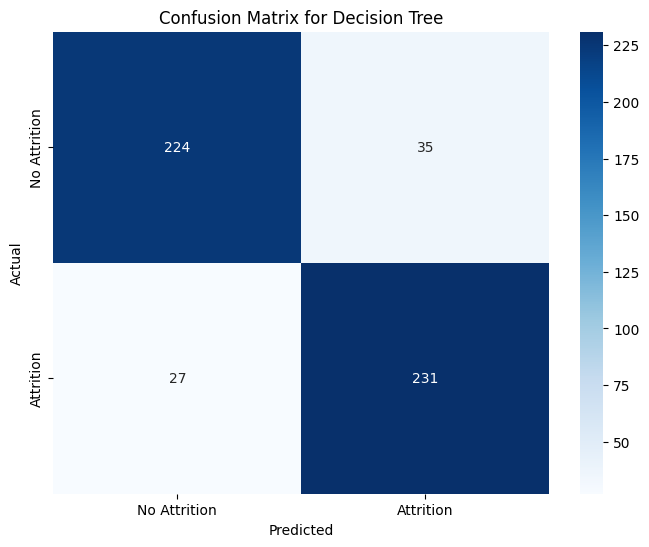

In [110]:
# prompt: buatkn confusion matrix nya untuk setiap model

# Ensure the confusion_matrix function is imported from sklearn.metrics
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    # Use the imported confusion_matrix function
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming X_test and y_test are already defined from your train_test_split
# Changed rf_model to model_rf
plot_confusion_matrix(model_rf, X_test, y_test, 'Random Forest')
plot_confusion_matrix(svm_model, X_test, y_test, 'SVM')
plot_confusion_matrix(lr_model, X_test, y_test, 'Logistic Regression')
plot_confusion_matrix(dt_model, X_test, y_test, 'Decision Tree')

In [111]:
#simpan mode terbaik

# Identify the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)

# Get the actual best model object
if best_model_name == 'Random Forest':
    best_model = model_rf
elif best_model_name == 'SVM':
    best_model = svm_model
elif best_model_name == 'Logistic Regression':
    best_model = lr_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
else:
    print("Error: Could not identify the best model object.")
    best_model = None

# Save the best model if found
if best_model:
    joblib.dump(best_model, 'model.h5')
    print(f"Best model ({best_model_name}) saved to model.h5")



Best model (Random Forest) saved to model.h5


In [112]:

!pip freeze > requirements.txt